In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('./ptpTime5min_4.csv')

In [3]:
df.drop(['Unnamed: 0'],axis='columns',inplace=True)

In [4]:
df.head()

,__REALTIME_TIMESTAMP,__MONOTONIC_TIMESTAMP,Master Offset,Frequency,Path Delay
0,1595404818767440,164236807918,-218926,20805,21888
1,1595404819767985,164237808464,-227942,11789,23490
2,1595404820769051,164238809529,13752,25541,23490
3,1595404821769584,164239810062,5915,21829,25092
4,1595404822770895,164240811374,3621,21310,25092


In [5]:
# Add abs master offset column to df_deleteErrdf, df, errdf

absMasterOffset = []

absMasterOffset = df['Master Offset'].abs()

df['Abs Master Offset'] = absMasterOffset

In [6]:
df.describe()

,__REALTIME_TIMESTAMP,__MONOTONIC_TIMESTAMP,Master Offset,Frequency,Path Delay,Abs Master Offset
count,2.880000e+02,2.880000e+02,288.000000,288.000000,288.000000,288.000000
mean,1.595405e+15,1.643804e+11,-1462.038194,19486.093750,24881.545139,2223.663194
std,8.336710e+07,8.336710e+07,18656.022635,1171.930889,273.526049,18580.373444
min,1.595405e+15,1.642368e+11,-227942.000000,11789.000000,21888.000000,3.000000
25%,1.595405e+15,1.643086e+11,-368.500000,19147.000000,24759.000000,180.000000
50%,1.595405e+15,1.643804e+11,-2.000000,19483.000000,24870.000000,398.500000
75%,1.595405e+15,1.644523e+11,434.250000,19848.000000,25024.750000,717.750000
max,1.595405e+15,1.645241e+11,13752.000000,25541.000000,25304.000000,227942.000000


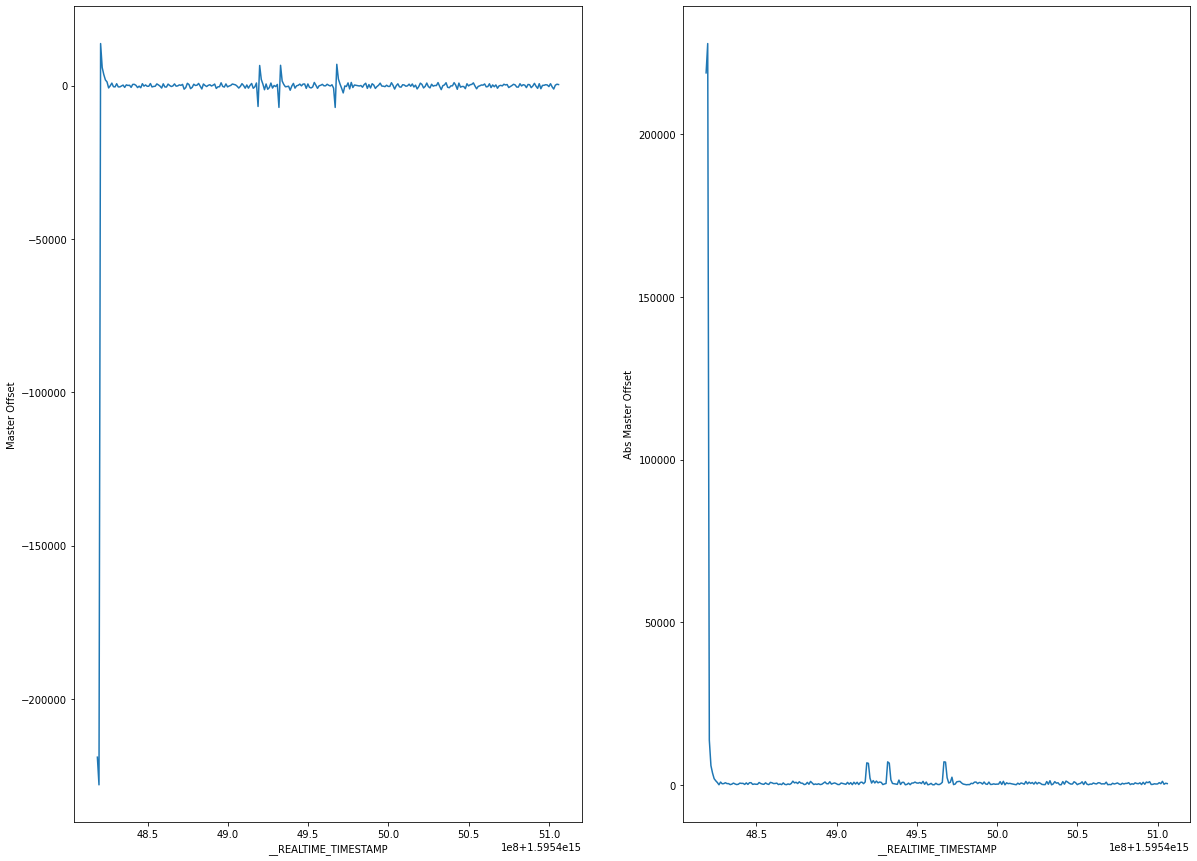

In [10]:
f, axes = plt.subplots(1,2, figsize = (20,15))

#Convergence index : 20, Offset = 164

sns.lineplot(x = "__REALTIME_TIMESTAMP", y = "Master Offset", data = df, ax=axes[0])
sns.lineplot(x = "__REALTIME_TIMESTAMP", y = "Abs Master Offset", data = df, ax = axes[1])

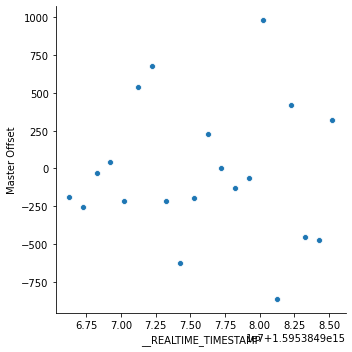

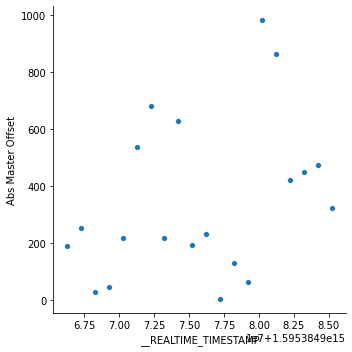

In [22]:
# Graph of 10 sec after convergence from 10 sec before convergence

sns.relplot(x = "__REALTIME_TIMESTAMP", y = "Master Offset", data = df[27:47])
sns.relplot(x = "__REALTIME_TIMESTAMP", y = "Abs Master Offset", data = df[27:47])

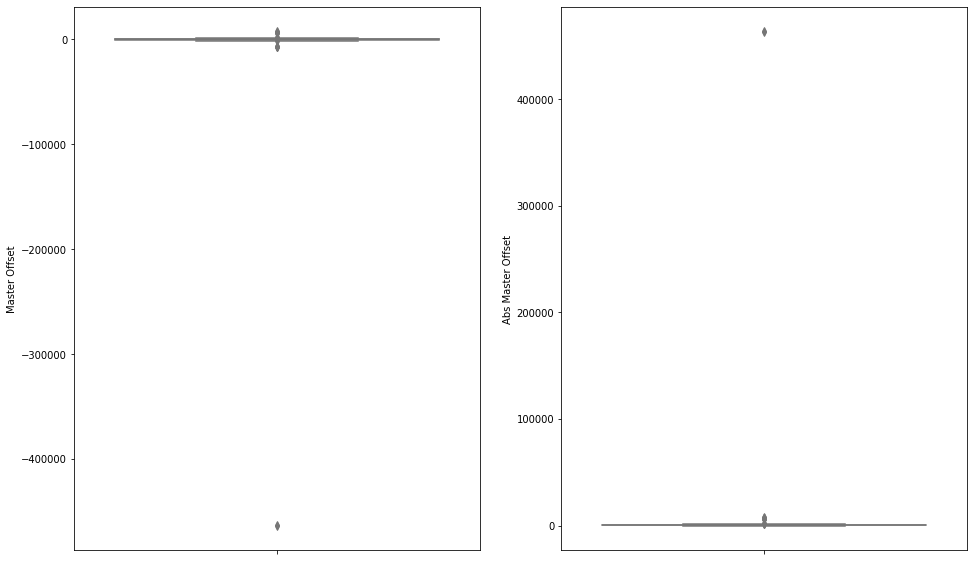

In [23]:
f, axes = plt.subplots(1,2, figsize = (16,10))
sns.boxplot(y='Master Offset', data = df, palette="Paired", ax = axes[0])
sns.boxplot(y='Abs Master Offset', data = df, palette="Paired", ax = axes[1])

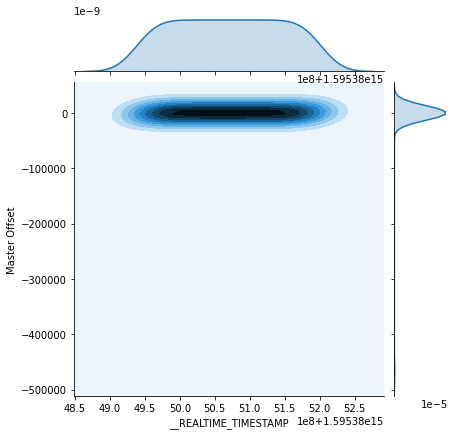

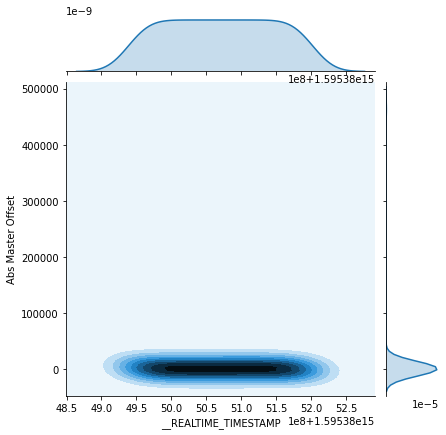

In [26]:
sns.jointplot(x='__REALTIME_TIMESTAMP', y = 'Master Offset', data = df, kind = "kde")
sns.jointplot(x='__REALTIME_TIMESTAMP', y = 'Abs Master Offset', data = df, kind = "kde")